# Project - Traffic Volume Prediction - Andre Piccolo - 300347025

* Dataset from: https://archive.ics.uci.edu/ml/datasets/metro+interstate+traffic+volume

## Library import

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import Ridge, Lasso 
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from catboost import CatBoostRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

## Load dataset

In [2]:
df = pd.read_csv('Dataset/Metro_Interstate_Traffic_Volume.csv')
df.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


In [4]:
df.shape

(48204, 9)

In [5]:
df.isnull().sum()

holiday                0
temp                   0
rain_1h                0
snow_1h                0
clouds_all             0
weather_main           0
weather_description    0
date_time              0
traffic_volume         0
dtype: int64

In [6]:
df.describe()

,temp,rain_1h,snow_1h,clouds_all,traffic_volume
count,48204.000000,48204.000000,48204.000000,48204.000000,48204.000000
mean,281.205870,0.334264,0.000222,49.362231,3259.818355
std,13.338232,44.789133,0.008168,39.015750,1986.860670
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,272.160000,0.000000,0.000000,1.000000,1193.000000
50%,282.450000,0.000000,0.000000,64.000000,3380.000000
75%,291.806000,0.000000,0.000000,90.000000,4933.000000
max,310.070000,9831.300000,0.510000,100.000000,7280.000000


* Convert temperature from Kelvin to Celsius

In [7]:
# Convert temperature from kelvin to celsius
df.temp = df.temp - 273.15
df.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,15.13,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,16.21,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,16.43,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,16.98,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,17.99,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [8]:
# Round temperature to consider only integer values
df.temp = df.temp.round(0)
df.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,15.0,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,16.0,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,16.0,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,17.0,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,18.0,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


* split date_time features in two new features

In [9]:
# split date_time in 2 columns
df[['date','time']] = df.date_time.str.split(' ', expand=True)
df.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume,date,time
0,None,15.0,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545,2012-10-02,09:00:00
1,None,16.0,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516,2012-10-02,10:00:00
2,None,16.0,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767,2012-10-02,11:00:00
3,None,17.0,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026,2012-10-02,12:00:00
4,None,18.0,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918,2012-10-02,13:00:00


In [10]:
# drop date_time
df.drop(columns=['date_time'], axis=1, inplace=True)
df.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,traffic_volume,date,time
0,None,15.0,0.0,0.0,40,Clouds,scattered clouds,5545,2012-10-02,09:00:00
1,None,16.0,0.0,0.0,75,Clouds,broken clouds,4516,2012-10-02,10:00:00
2,None,16.0,0.0,0.0,90,Clouds,overcast clouds,4767,2012-10-02,11:00:00
3,None,17.0,0.0,0.0,90,Clouds,overcast clouds,5026,2012-10-02,12:00:00
4,None,18.0,0.0,0.0,75,Clouds,broken clouds,4918,2012-10-02,13:00:00


In [11]:
df.time.unique()

array(['09:00:00', '10:00:00', '11:00:00', '12:00:00', '13:00:00',
       '14:00:00', '15:00:00', '16:00:00', '17:00:00', '18:00:00',
       '19:00:00', '20:00:00', '21:00:00', '22:00:00', '23:00:00',
       '00:00:00', '01:00:00', '02:00:00', '03:00:00', '04:00:00',
       '05:00:00', '06:00:00', '08:00:00', '07:00:00'], dtype=object)

In [12]:
# convert time to show only hour
df.time = df.time.apply(lambda x: x[0:2])
df.time.unique()

array(['09', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19',
       '20', '21', '22', '23', '00', '01', '02', '03', '04', '05', '06',
       '08', '07'], dtype=object)

In [13]:
# convert time to int
df.time = df.time.astype('int32')
df.time.unique()

array([ 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23,  0,  1,
        2,  3,  4,  5,  6,  8,  7])

In [14]:
# Split date to get information about month
df[['year','month', 'day']] = df.date.str.split('-', expand=True)

* Change date for a meanning value, days of week is beeter aproach to know the traffic volume.
* If a road is used from monday to friday, means that people use it to commuting to work or school
* If a road is used on weekends, this means that is a road for free time activities

In [15]:
# Monday=0..., Sunday=6.
df.date = df.date.apply(lambda x: pd.Timestamp(x).dayofweek)
df.date.unique()


array([1, 2, 3, 4, 5, 6, 0], dtype=int64)

In [16]:
df.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,traffic_volume,date,time,year,month,day
0,None,15.0,0.0,0.0,40,Clouds,scattered clouds,5545,1,9,2012,10,02
1,None,16.0,0.0,0.0,75,Clouds,broken clouds,4516,1,10,2012,10,02
2,None,16.0,0.0,0.0,90,Clouds,overcast clouds,4767,1,11,2012,10,02
3,None,17.0,0.0,0.0,90,Clouds,overcast clouds,5026,1,12,2012,10,02
4,None,18.0,0.0,0.0,75,Clouds,broken clouds,4918,1,13,2012,10,02


* Year and day is not significant, just month is relevant.
* Example, december and july can be the months with more traffic volume related to vacations. For this reason I will drop year and day

In [17]:
df.drop(columns=['year','day'], axis=1, inplace=True)
df.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,traffic_volume,date,time,month
0,None,15.0,0.0,0.0,40,Clouds,scattered clouds,5545,1,9,10
1,None,16.0,0.0,0.0,75,Clouds,broken clouds,4516,1,10,10
2,None,16.0,0.0,0.0,90,Clouds,overcast clouds,4767,1,11,10
3,None,17.0,0.0,0.0,90,Clouds,overcast clouds,5026,1,12,10
4,None,18.0,0.0,0.0,75,Clouds,broken clouds,4918,1,13,10


In [18]:
# change date column name to day_of_week
df.columns = df.columns.str.replace("date","day_of_week")
df.columns = df.columns.str.replace("time","hour")
df.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,traffic_volume,day_of_week,hour,month
0,None,15.0,0.0,0.0,40,Clouds,scattered clouds,5545,1,9,10
1,None,16.0,0.0,0.0,75,Clouds,broken clouds,4516,1,10,10
2,None,16.0,0.0,0.0,90,Clouds,overcast clouds,4767,1,11,10
3,None,17.0,0.0,0.0,90,Clouds,overcast clouds,5026,1,12,10
4,None,18.0,0.0,0.0,75,Clouds,broken clouds,4918,1,13,10


In [19]:
# # Round temperature to consider only integer values
# df.temp = df.temp.round(0)
# df.head()

In [20]:
df.holiday.value_counts()

None                         48143
Labor Day                        7
Thanksgiving Day                 6
Christmas Day                    6
New Years Day                    6
Martin Luther King Jr Day        6
Columbus Day                     5
Veterans Day                     5
Washingtons Birthday             5
Memorial Day                     5
Independence Day                 5
State Fair                       5
Name: holiday, dtype: int64

* Considering only if is a holiday or not. For this prediction, the kind of holiday will not do a difference in prediction

In [21]:
def changeHolidayValue(x):
    if(x ==  "None"):
        x="0"
    else:
        x="1"
    return x

df.holiday = df.holiday.apply(lambda x: changeHolidayValue(x))
df.holiday.unique()

array(['0', '1'], dtype=object)

In [22]:
# Convert holiday from object to int
df.holiday = df.holiday.astype('int32')
df.holiday.unique()

array([0, 1])

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  int32  
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   traffic_volume       48204 non-null  int64  
 8   day_of_week          48204 non-null  int64  
 9   hour                 48204 non-null  int32  
 10  month                48204 non-null  object 
dtypes: float64(3), int32(2), int64(3), object(3)
memory usage: 3.7+ MB


In [24]:
df.weather_main.value_counts()

Clouds          15164
Clear           13391
Mist             5950
Rain             5672
Snow             2876
Drizzle          1821
Haze             1360
Thunderstorm     1034
Fog               912
Smoke              20
Squall              4
Name: weather_main, dtype: int64

In [25]:
# Rename values that are bellow than snow value (28756) to other
for weatherSnow in df.weather_main.unique():
    if((df.weather_main.values == weatherSnow).sum() < 2876):
        df.loc[df.weather_main.str.contains(weatherSnow),'weather_main'] = 'other'
df.weather_main.value_counts()

Clouds    15164
Clear     13391
Mist       5950
Rain       5672
other      5151
Snow       2876
Name: weather_main, dtype: int64

In [26]:
df.weather_description.value_counts()

sky is clear                           11665
mist                                    5950
overcast clouds                         5081
broken clouds                           4666
scattered clouds                        3461
light rain                              3372
few clouds                              1956
light snow                              1946
Sky is Clear                            1726
moderate rain                           1664
haze                                    1360
light intensity drizzle                 1100
fog                                      912
proximity thunderstorm                   673
drizzle                                  651
heavy snow                               616
heavy intensity rain                     467
snow                                     293
proximity shower rain                    136
thunderstorm                             125
heavy intensity drizzle                   64
thunderstorm with heavy rain              63
thundersto

In [27]:
# Drop weather description and keep only weather_main
df.drop(columns=['weather_description'], axis=1, inplace=True)
df.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,traffic_volume,day_of_week,hour,month
0,0,15.0,0.0,0.0,40,Clouds,5545,1,9,10
1,0,16.0,0.0,0.0,75,Clouds,4516,1,10,10
2,0,16.0,0.0,0.0,90,Clouds,4767,1,11,10
3,0,17.0,0.0,0.0,90,Clouds,5026,1,12,10
4,0,18.0,0.0,0.0,75,Clouds,4918,1,13,10


In [28]:
reorderColumns = ['traffic_volume','hour','day_of_week','month','temp','holiday','rain_1h','snow_1h','clouds_all','weather_main']
df = df.reindex(columns=reorderColumns)
df.head()

,traffic_volume,hour,day_of_week,month,temp,holiday,rain_1h,snow_1h,clouds_all,weather_main
0,5545,9,1,10,15.0,0,0.0,0.0,40,Clouds
1,4516,10,1,10,16.0,0,0.0,0.0,75,Clouds
2,4767,11,1,10,16.0,0,0.0,0.0,90,Clouds
3,5026,12,1,10,17.0,0,0.0,0.0,90,Clouds
4,4918,13,1,10,18.0,0,0.0,0.0,75,Clouds


In [29]:
df.rain_1h.value_counts()

0.00    44737
0.25      948
0.51      256
1.02      123
0.30      121
        ...  
1.28        1
1.47        1
4.66        1
2.08        1
2.35        1
Name: rain_1h, Length: 372, dtype: int64

In [30]:
# Round rain to consider only integer values
df.rain_1h = df.rain_1h.round(0)
df.rain_1h.value_counts()

0.0       46080
1.0        1070
2.0         407
3.0         193
5.0          89
4.0          87
6.0          71
7.0          42
8.0          35
9.0          21
10.0         19
11.0         17
13.0         13
12.0         11
20.0         10
25.0          6
16.0          6
15.0          5
21.0          3
24.0          3
28.0          3
14.0          3
29.0          2
18.0          2
44.0          1
56.0          1
19.0          1
9831.0        1
17.0          1
32.0          1
Name: rain_1h, dtype: int64

In [31]:
# After 6 there are just few values, so I will consider anything more than 6, will be 6
def changeRain1h(x):
    if(x > 6):
        x=6
    else:
        x=x
    return x

df.rain_1h = df.rain_1h.apply(lambda x: changeRain1h(x))
df.rain_1h.value_counts()

0.0    46080
1.0     1070
2.0      407
6.0      278
3.0      193
5.0       89
4.0       87
Name: rain_1h, dtype: int64

In [32]:
df.snow_1h.value_counts()

0.00    48141
0.05       14
0.06       12
0.51        6
0.25        6
0.13        6
0.10        6
0.32        5
0.17        3
0.44        2
0.08        2
0.21        1
Name: snow_1h, dtype: int64

* Snow has a minimun variance in dataset, so we can drop it

In [33]:
df.drop(columns=['snow_1h'], axis=1, inplace=True)
df.head()

,traffic_volume,hour,day_of_week,month,temp,holiday,rain_1h,clouds_all,weather_main
0,5545,9,1,10,15.0,0,0.0,40,Clouds
1,4516,10,1,10,16.0,0,0.0,75,Clouds
2,4767,11,1,10,16.0,0,0.0,90,Clouds
3,5026,12,1,10,17.0,0,0.0,90,Clouds
4,4918,13,1,10,18.0,0,0.0,75,Clouds


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   traffic_volume  48204 non-null  int64  
 1   hour            48204 non-null  int32  
 2   day_of_week     48204 non-null  int64  
 3   month           48204 non-null  object 
 4   temp            48204 non-null  float64
 5   holiday         48204 non-null  int32  
 6   rain_1h         48204 non-null  float64
 7   clouds_all      48204 non-null  int64  
 8   weather_main    48204 non-null  object 
dtypes: float64(2), int32(2), int64(3), object(2)
memory usage: 2.9+ MB


In [35]:
df.month.unique()

array(['10', '11', '12', '01', '02', '03', '04', '05', '06', '07', '08',
       '09'], dtype=object)

In [36]:
# change month to int type
df.month = df.month.astype('int32')
df.month.unique()

array([10, 11, 12,  1,  2,  3,  4,  5,  6,  7,  8,  9])

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   traffic_volume  48204 non-null  int64  
 1   hour            48204 non-null  int32  
 2   day_of_week     48204 non-null  int64  
 3   month           48204 non-null  int32  
 4   temp            48204 non-null  float64
 5   holiday         48204 non-null  int32  
 6   rain_1h         48204 non-null  float64
 7   clouds_all      48204 non-null  int64  
 8   weather_main    48204 non-null  object 
dtypes: float64(2), int32(3), int64(3), object(1)
memory usage: 2.8+ MB


In [38]:
# make dummies from wheather_main
df.columns = df.columns.str.replace("weather_main","weather")
df = pd.get_dummies(df, drop_first=True)
df.head()

,traffic_volume,hour,day_of_week,month,temp,holiday,rain_1h,clouds_all,weather_Clouds,weather_Mist,weather_Rain,weather_Snow,weather_other
0,5545,9,1,10,15.0,0,0.0,40,1,0,0,0,0
1,4516,10,1,10,16.0,0,0.0,75,1,0,0,0,0
2,4767,11,1,10,16.0,0,0.0,90,1,0,0,0,0
3,5026,12,1,10,17.0,0,0.0,90,1,0,0,0,0
4,4918,13,1,10,18.0,0,0.0,75,1,0,0,0,0


In [39]:
df.describe()

,traffic_volume,hour,day_of_week,month,temp,holiday,rain_1h,clouds_all,weather_Clouds,weather_Mist,weather_Rain,weather_Snow,weather_other
count,48204.000000,48204.000000,48204.000000,48204.000000,48204.000000,48204.000000,48204.000000,48204.000000,48204.000000,48204.000000,48204.000000,48204.000000,48204.000000
mean,3259.818355,11.398162,2.984980,6.506037,8.054705,0.001265,0.102149,49.362231,0.314580,0.123434,0.117667,0.059663,0.106858
std,1986.860670,6.940238,2.005941,3.400221,13.338173,0.035551,0.603515,39.015750,0.464353,0.328938,0.322216,0.236864,0.308936
min,0.000000,0.000000,0.000000,1.000000,-273.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1193.000000,5.000000,1.000000,4.000000,-1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3380.000000,11.000000,3.000000,7.000000,9.000000,0.000000,0.000000,64.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4933.000000,17.000000,5.000000,9.000000,19.000000,0.000000,0.000000,90.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,7280.000000,23.000000,6.000000,12.000000,37.000000,1.000000,6.000000,100.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [40]:
df.temp.value_counts()

 18.0    1840
 1.0     1720
 2.0     1628
 19.0    1590
 21.0    1575
         ... 
-28.0       5
 36.0       4
-30.0       2
-29.0       1
 37.0       1
Name: temp, Length: 69, dtype: int64

In [41]:
# Remove temperatures that count is under 400 
for temperature in df.temp.unique():
    if((df.temp.values == temperature).sum() < 400):
        df = df.loc[df.temp != temperature] # Save only temperatures is different from selected
df.temp.value_counts()

 18.0    1840
 1.0     1720
 2.0     1628
 19.0    1590
 21.0    1575
 17.0    1538
 22.0    1517
 20.0    1486
 16.0    1450
 14.0    1369
-2.0     1368
-1.0     1359
 3.0     1358
-0.0     1316
 23.0    1284
 15.0    1233
 12.0    1153
 13.0    1149
 4.0     1090
-3.0     1021
 11.0    1020
 24.0    1001
 25.0     953
-4.0      921
 6.0      919
 5.0      911
 8.0      891
 9.0      862
 7.0      857
 10.0     847
 26.0     806
-5.0      762
-6.0      736
-8.0      692
 27.0     679
-7.0      676
 28.0     541
-9.0      520
-13.0     442
-12.0     441
-10.0     437
-11.0     435
-14.0     404
Name: temp, dtype: int64

In [42]:
df.describe()

,traffic_volume,hour,day_of_week,month,temp,holiday,rain_1h,clouds_all,weather_Clouds,weather_Mist,weather_Rain,weather_Snow,weather_other
count,44797.000000,44797.000000,44797.000000,44797.000000,44797.000000,44797.000000,44797.000000,44797.000000,44797.000000,44797.000000,44797.000000,44797.000000,44797.000000
mean,3255.856196,11.375159,2.985870,6.618702,9.181106,0.001295,0.109449,50.798156,0.310958,0.130522,0.125499,0.058866,0.110677
std,1992.446833,6.965494,2.003379,3.300168,11.014517,0.035959,0.624463,38.978401,0.462891,0.336881,0.331288,0.235376,0.313735
min,0.000000,0.000000,0.000000,1.000000,-14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1179.000000,5.000000,1.000000,4.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3355.000000,11.000000,3.000000,7.000000,10.000000,0.000000,0.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4941.000000,17.000000,5.000000,9.000000,19.000000,0.000000,0.000000,90.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,7280.000000,23.000000,6.000000,12.000000,28.000000,1.000000,6.000000,100.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Saved cleaned dataframe

In [43]:
df.to_csv('Dataset/Project_APi47025_cleaned.csv',index=False)

In [44]:
df.corr()

,traffic_volume,hour,day_of_week,month,temp,holiday,rain_1h,clouds_all,weather_Clouds,weather_Mist,weather_Rain,weather_Snow,weather_other
traffic_volume,1.000000,0.348531,-0.152164,-0.012662,0.103115,-0.043624,-0.015611,0.068872,0.118855,-0.061021,0.010034,-0.029444,-0.015236
hour,0.348531,1.000000,-0.005885,-0.009312,0.087980,-0.058801,-0.012232,0.058608,0.101444,-0.101826,0.012623,-0.004402,-0.029461
day_of_week,-0.152164,-0.005885,1.000000,0.011502,-0.018958,-0.032283,-0.007597,-0.038041,0.003150,-0.015327,-0.015726,-0.016462,-0.014453
month,-0.012662,-0.009312,0.011502,1.000000,0.190061,0.005665,0.029805,-0.036124,-0.033793,0.016976,0.020125,-0.025448,-0.002642
temp,0.103115,0.087980,-0.018958,0.190061,1.000000,-0.008877,0.120748,-0.187818,-0.000849,-0.085501,0.157316,-0.302134,0.032701
holiday,-0.043624,-0.058801,-0.032283,0.005665,-0.008877,1.000000,-0.002334,-0.006407,-0.001389,0.004477,-0.004271,0.001545,-0.002808
rain_1h,-0.015611,-0.012232,-0.007597,0.029805,0.120748,-0.002334,1.000000,0.110432,-0.117744,0.049879,0.196463,-0.038367,0.088688
clouds_all,0.068872,0.058608,-0.038041,-0.036124,-0.187818,-0.006407,0.110432,1.000000,0.240217,0.153795,0.213980,0.207805,0.159512
weather_Clouds,0.118855,0.101444,0.003150,-0.033793,-0.000849,-0.001389,-0.117744,0.240217,1.000000,-0.260280,-0.254489,-0.168009,-0.236989
weather_Mist,-0.061021,-0.101826,-0.015327,0.016976,-0.085501,0.004477,0.049879,0.153795,-0.260280,1.000000,-0.146776,-0.096899,-0.136682


* correlation is showing that there is no individual feature that have a strong correlation with traffic volume

AxesSubplot(0.125,0.1925;0.62x0.62)


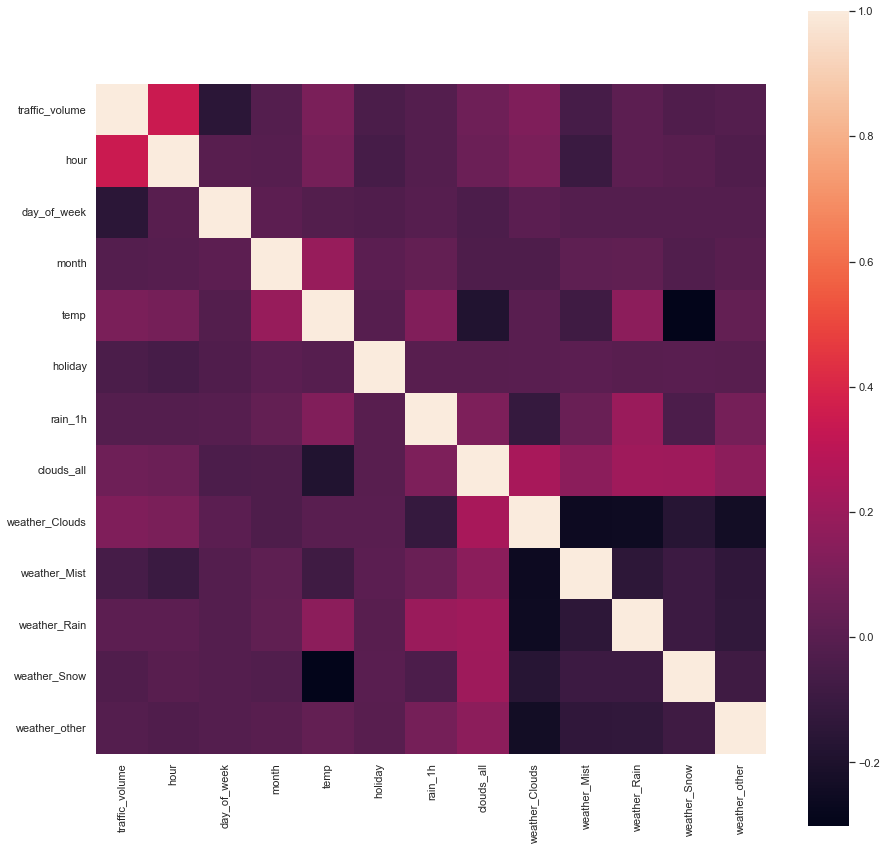

In [45]:
plt.figure(figsize=(15,15))
sns.set(font_scale=1)
print(sns.heatmap(df.corr(),
           cbar=True,
           annot=False,
           square=True,
           yticklabels=df.columns,
            xticklabels=df.columns))
plt.savefig('Report/heatmap.png', dpi=400, bbox_inches='tight')

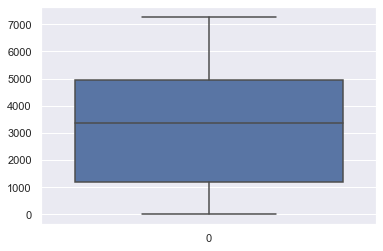

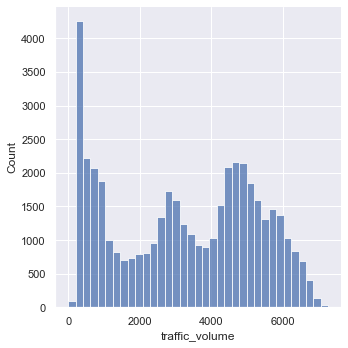

In [46]:
sns.boxplot(data=df.traffic_volume)
sns.displot(df.traffic_volume)

* traffic volume has a good distribution

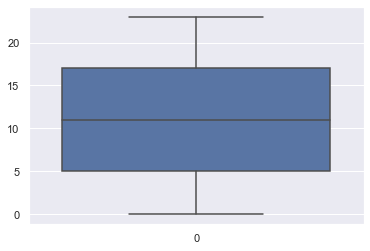

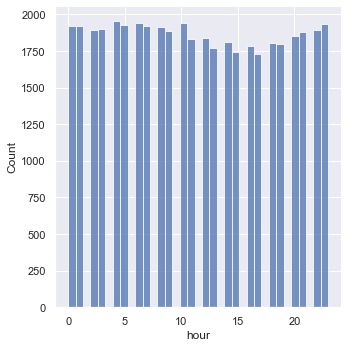

In [47]:
sns.boxplot(data=df.hour)
sns.displot(df.hour)

* Hour has a good distribution value

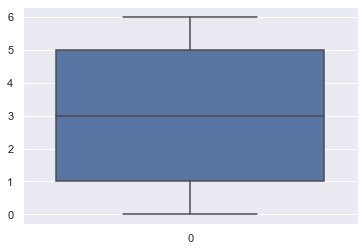

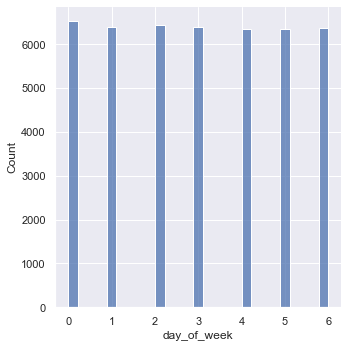

In [48]:
sns.boxplot(data=df.day_of_week)
sns.displot(df.day_of_week)

* Day_of_week has good distribution, because data was got from each hour during all the days of week

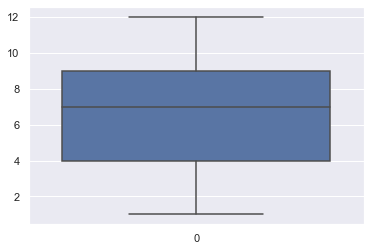

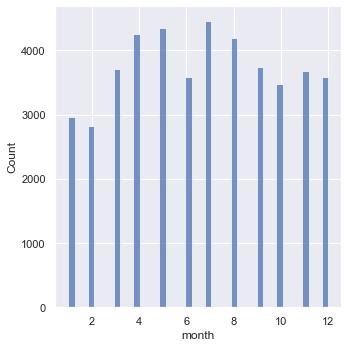

In [49]:
sns.boxplot(data=df.month)
sns.displot(df.month)

* Month has a good distribution value

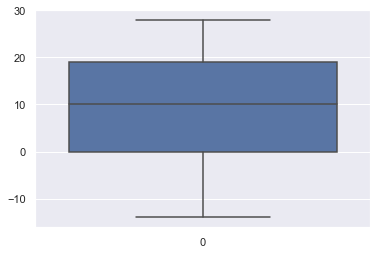

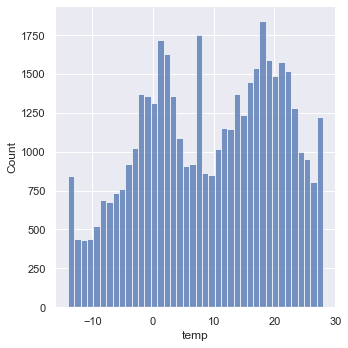

In [50]:
sns.boxplot(data=df.temp)
sns.displot(df.temp)

* Temperature has a good distribution value

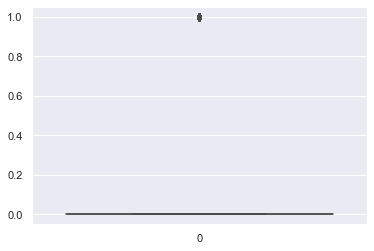

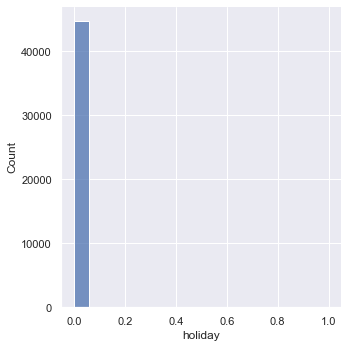

In [51]:
sns.boxplot(data=df.holiday)
sns.displot(df.holiday)

* There are just few values in holidays, the biggest data is from regular days as you can see in the picture

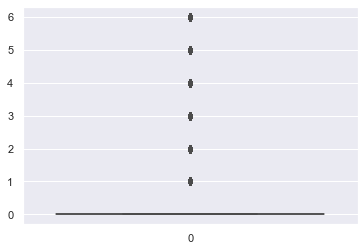

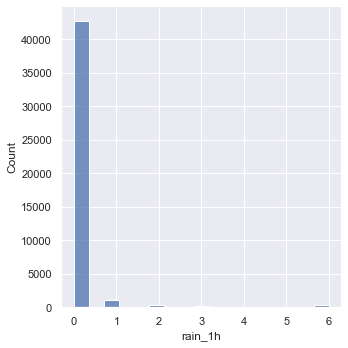

In [52]:
sns.boxplot(data=df.rain_1h)
sns.displot(df.rain_1h)

* The main data in rain is concentrated in value 0

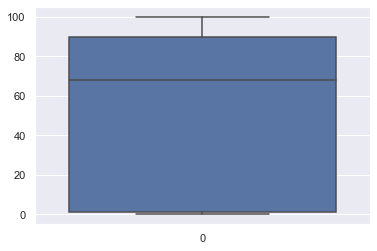

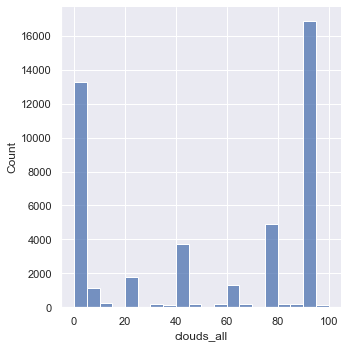

In [53]:
sns.boxplot(data=df.clouds_all)
sns.displot(df.clouds_all)

* Clouds_all feature has a good distribution

<AxesSubplot:xlabel='hour', ylabel='traffic_volume'>

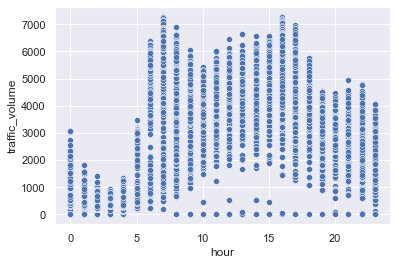

In [54]:
sns.scatterplot(x=df.hour, y=df.traffic_volume)

* Hour can affect the traffic volume. The bigger traffic is during 8am to 8pm

<AxesSubplot:xlabel='day_of_week', ylabel='traffic_volume'>

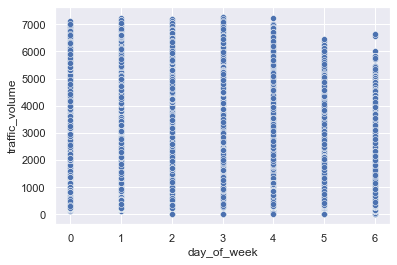

In [55]:
sns.scatterplot(x=df.day_of_week, y=df.traffic_volume)

* Saturday(5) and Sunday(6) have less traffic volume

<AxesSubplot:xlabel='month', ylabel='traffic_volume'>

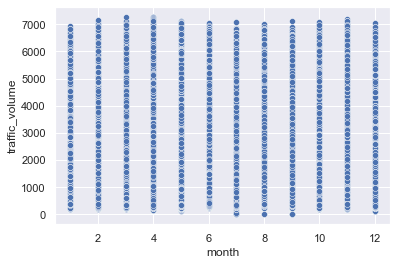

In [56]:
sns.scatterplot(x=df.month, y=df.traffic_volume)

* Month seems that have a constant distribution, without a variation

<AxesSubplot:xlabel='temp', ylabel='traffic_volume'>

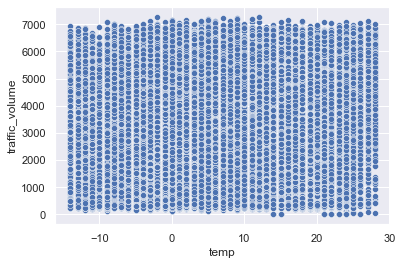

In [57]:
sns.scatterplot(x=df.temp, y=df.traffic_volume)


* Temperature has no affect in traffic volume

<AxesSubplot:xlabel='holiday', ylabel='traffic_volume'>

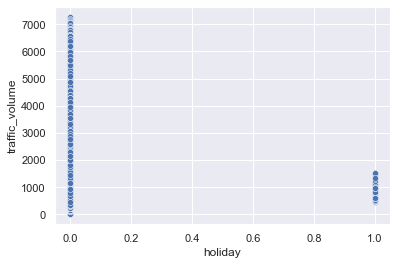

In [58]:
sns.scatterplot(x=df.holiday, y=df.traffic_volume)


* Just few values in holiday, so it is hard to correlate traffic with holiday

<AxesSubplot:xlabel='rain_1h', ylabel='traffic_volume'>

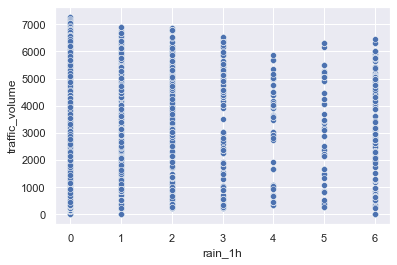

In [59]:
sns.scatterplot(x=df.rain_1h, y=df.traffic_volume)


* rain_1h has no affect in traffic volume

<AxesSubplot:xlabel='clouds_all', ylabel='traffic_volume'>

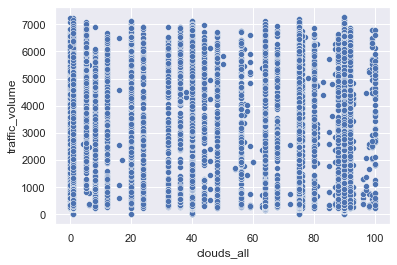

In [60]:
sns.scatterplot(x=df.clouds_all, y=df.traffic_volume)


* clouds_all has no affect in traffic volume

## Create models

In [61]:
# Save price in target variable
target = df.traffic_volume

# remove price from copy dataframe
features = df.drop('traffic_volume', axis=1)

## Variance threshold

In [62]:
vt = VarianceThreshold(threshold=0.1) # Considerind threshold between 0.1 and 0.2
vt.fit(features) # Using DataFrame whithout price
df_vt = features.iloc[:,vt.get_support()]
df_vt.head()

,hour,day_of_week,month,temp,rain_1h,clouds_all,weather_Clouds,weather_Mist,weather_Rain
0,9,1,10,15.0,0.0,40,1,0,0
1,10,1,10,16.0,0.0,75,1,0,0
2,11,1,10,16.0,0.0,90,1,0,0
3,12,1,10,17.0,0.0,90,1,0,0
4,13,1,10,18.0,0.0,75,1,0,0


## KBest feature selection

In [63]:
kbest = SelectKBest(score_func=f_regression, k=10) # select 10 features

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.25, random_state=42)

kbest.fit_transform(X_train, y_train)
df_selKBest = features.iloc[:,kbest.get_support()]
df_selKBest.head()

,hour,day_of_week,temp,holiday,rain_1h,clouds_all,weather_Clouds,weather_Mist,weather_Snow,weather_other
0,9,1,15.0,0,0.0,40,1,0,0,0
1,10,1,16.0,0,0.0,75,1,0,0,0
2,11,1,16.0,0,0.0,90,1,0,0,0
3,12,1,17.0,0,0.0,90,1,0,0,0
4,13,1,18.0,0,0.0,75,1,0,0,0


## Randon Forest as estimator

In [64]:
sfm_selec = SelectFromModel(estimator=RandomForestClassifier(n_estimators=100, max_leaf_nodes=8)).fit(features, target)
sfm_selec.transform(features)
sfm_df = features.iloc[:,sfm_selec.get_support()]
sfm_df.head()

,hour,day_of_week,temp,rain_1h,clouds_all
0,9,1,15.0,0.0,40
1,10,1,16.0,0.0,75
2,11,1,16.0,0.0,90
3,12,1,17.0,0.0,90
4,13,1,18.0,0.0,75


## Support methods to run pipeline

In [65]:
name=[]
models_result=[]
y_preds=[]
r2=[]
rmse=[]
estimator=[]
y_test_plot=[]
dataframes=[]

def runPipeline(models, dataframe, X_train, X_test, y_train, y_test, estimatorName):    
    for model in models:
        pipe = Pipeline([('preprocessor', PolynomialFeatures(degree=2, include_bias=False, interaction_only=False)),
                         ('regressor', model)])
        pipe.fit(X_train, y_train)
        y_pred = pipe.predict(X_test)
        y_preds.append(y_pred)
        r2.append(pipe.score(X_test, y_test))
        rmse.append(mean_squared_error(y_test, y_pred, squared=False))
        models_result.append(pipe)
        name.append(model.__class__.__name__)
        estimator.append(estimatorName)
        y_test_plot.append(y_test)
        dataframes.append(dataframe)

## Create Pipeline with Random Forest estimator

In [66]:
# Load models list
models=[LinearRegression(),DecisionTreeRegressor(max_depth=3), GradientBoostingRegressor(), 
        RandomForestRegressor(n_estimators=100, max_depth=3),AdaBoostRegressor(n_estimators=50), 
        CatBoostRegressor(n_estimators=50)]

XRF_train, XRF_test, yRF_train, yRF_test = train_test_split(sfm_df, target, test_size=0.25)
runPipeline(models, sfm_df, XRF_train, XRF_test, yRF_train, yRF_test, "Random Forest")

Learning rate set to 0.5
0:	learn: 1173.0307581	total: 188ms	remaining: 9.23s
1:	learn: 801.0944312	total: 197ms	remaining: 4.73s
2:	learn: 648.2577491	total: 205ms	remaining: 3.21s
3:	learn: 578.8520324	total: 213ms	remaining: 2.45s
4:	learn: 552.7022522	total: 221ms	remaining: 1.99s
5:	learn: 536.1406716	total: 229ms	remaining: 1.68s
6:	learn: 526.6949958	total: 237ms	remaining: 1.46s
7:	learn: 519.9274625	total: 244ms	remaining: 1.28s
8:	learn: 515.6824472	total: 251ms	remaining: 1.14s
9:	learn: 511.7958669	total: 258ms	remaining: 1.03s
10:	learn: 506.5398084	total: 265ms	remaining: 939ms
11:	learn: 503.6902832	total: 272ms	remaining: 862ms
12:	learn: 501.3361415	total: 278ms	remaining: 793ms
13:	learn: 497.8643555	total: 286ms	remaining: 735ms
14:	learn: 495.8218568	total: 292ms	remaining: 682ms
15:	learn: 493.9251795	total: 300ms	remaining: 637ms
16:	learn: 493.5459460	total: 306ms	remaining: 594ms
17:	learn: 491.3978682	total: 313ms	remaining: 556ms
18:	learn: 490.1837687	total: 

## Create Pipeline with KBest estimator

In [67]:
# Load models list
models=[LinearRegression(),DecisionTreeRegressor(max_depth=3), GradientBoostingRegressor(), 
        RandomForestRegressor(n_estimators=100, max_depth=3),AdaBoostRegressor(n_estimators=50), 
        CatBoostRegressor(n_estimators=50)]

XKB_train, XKB_test, yKB_train, yKB_test = train_test_split(df_selKBest, target, test_size=0.25)
runPipeline(models, df_selKBest, XKB_train, XKB_test, yKB_train, yKB_test, "KBest")

Learning rate set to 0.5
0:	learn: 1187.0464422	total: 9.29ms	remaining: 455ms
1:	learn: 839.8148852	total: 17.5ms	remaining: 421ms
2:	learn: 674.6410859	total: 25.7ms	remaining: 402ms
3:	learn: 609.8747686	total: 33.4ms	remaining: 385ms
4:	learn: 570.9244168	total: 41.8ms	remaining: 376ms
5:	learn: 551.7925233	total: 49.3ms	remaining: 362ms
6:	learn: 538.6273759	total: 57.5ms	remaining: 353ms
7:	learn: 529.5187202	total: 65.5ms	remaining: 344ms
8:	learn: 520.1192746	total: 73.5ms	remaining: 335ms
9:	learn: 514.4547337	total: 81.3ms	remaining: 325ms
10:	learn: 507.3462516	total: 89.6ms	remaining: 318ms
11:	learn: 504.6594122	total: 97.1ms	remaining: 308ms
12:	learn: 502.4597653	total: 105ms	remaining: 299ms
13:	learn: 499.0452243	total: 112ms	remaining: 289ms
14:	learn: 496.5627377	total: 120ms	remaining: 280ms
15:	learn: 494.7589951	total: 128ms	remaining: 272ms
16:	learn: 491.4563708	total: 135ms	remaining: 263ms
17:	learn: 490.5298859	total: 143ms	remaining: 254ms
18:	learn: 487.214

## Create Pipeline with Variance Treshold estimator

In [68]:
# Load models list
models=[LinearRegression(),DecisionTreeRegressor(max_depth=3), GradientBoostingRegressor(), 
        RandomForestRegressor(n_estimators=100, max_depth=3),AdaBoostRegressor(n_estimators=50), 
        CatBoostRegressor(n_estimators=50)]

XVT_train, XVT_test, yVT_train, yVT_test = train_test_split(df_vt, target, test_size=0.25)
runPipeline(models, df_vt, XVT_train, XVT_test, yVT_train, yVT_test, "Variance Treshold")

Learning rate set to 0.5
0:	learn: 1181.2631574	total: 10.1ms	remaining: 494ms
1:	learn: 835.5473646	total: 18.7ms	remaining: 449ms
2:	learn: 676.9537833	total: 27.4ms	remaining: 429ms
3:	learn: 609.3097054	total: 36.2ms	remaining: 416ms
4:	learn: 567.3936122	total: 44.8ms	remaining: 403ms
5:	learn: 550.7180206	total: 53ms	remaining: 389ms
6:	learn: 536.2515611	total: 61.3ms	remaining: 376ms
7:	learn: 526.9676699	total: 69.8ms	remaining: 367ms
8:	learn: 518.1819222	total: 78.1ms	remaining: 356ms
9:	learn: 512.9911130	total: 86.6ms	remaining: 346ms
10:	learn: 507.3502159	total: 94.7ms	remaining: 336ms
11:	learn: 501.6017369	total: 104ms	remaining: 328ms
12:	learn: 498.4233038	total: 111ms	remaining: 317ms
13:	learn: 495.8951735	total: 120ms	remaining: 307ms
14:	learn: 492.9510094	total: 127ms	remaining: 297ms
15:	learn: 488.9055073	total: 137ms	remaining: 290ms
16:	learn: 484.1947710	total: 145ms	remaining: 282ms
17:	learn: 480.9880407	total: 154ms	remaining: 273ms
18:	learn: 479.191535

In [69]:
res_df = pd.DataFrame(zip(name, estimator, r2, rmse), columns=['Model','Estimator','R2 Score','RMSE'])
res_df

,Model,Estimator,R2 Score,RMSE
0,LinearRegression,Random Forest,0.702484,1087.181496
1,DecisionTreeRegressor,Random Forest,0.837033,804.631940
2,GradientBoostingRegressor,Random Forest,0.932539,517.694259
3,RandomForestRegressor,Random Forest,0.837029,804.640680
4,AdaBoostRegressor,Random Forest,0.816545,853.712794
5,CatBoostRegressor,Random Forest,0.944344,470.222786
6,LinearRegression,KBest,0.701406,1086.771352
7,DecisionTreeRegressor,KBest,0.832340,814.352701
8,GradientBoostingRegressor,KBest,0.930227,525.341233
9,RandomForestRegressor,KBest,0.832340,814.353919


In [70]:
# Find the better model with max R2 Score
index_best = res_df.iloc[res_df['R2 Score'].idxmax()].name
best_model = models_result[index_best]
best_predict = y_preds[index_best]
y_test_selected = y_test_plot[index_best]
selected_dataframe = dataframes[index_best]

print("The best model is %s using estimator %s in position %d"% (name[index_best], estimator[index_best], index_best))

The best model is CatBoostRegressor using estimator Variance Treshold in position 17


## Plot the best model

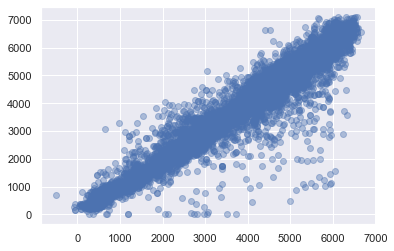

In [71]:
plt.scatter(best_predict, y_test_selected, alpha=0.4, color='b')

* There are some outliers that is not predicted

## Out of sample Prediction

In [72]:
# Get dataset from best estimator
selected_dataframe.shape

(44797, 9)

In [73]:
selected_dataframe.describe()

,hour,day_of_week,month,temp,rain_1h,clouds_all,weather_Clouds,weather_Mist,weather_Rain
count,44797.000000,44797.000000,44797.000000,44797.000000,44797.000000,44797.000000,44797.000000,44797.000000,44797.000000
mean,11.375159,2.985870,6.618702,9.181106,0.109449,50.798156,0.310958,0.130522,0.125499
std,6.965494,2.003379,3.300168,11.014517,0.624463,38.978401,0.462891,0.336881,0.331288
min,0.000000,0.000000,1.000000,-14.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.000000,1.000000,4.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,11.000000,3.000000,7.000000,10.000000,0.000000,68.000000,0.000000,0.000000,0.000000
75%,17.000000,5.000000,9.000000,19.000000,0.000000,90.000000,1.000000,0.000000,0.000000
max,23.000000,6.000000,12.000000,28.000000,6.000000,100.000000,1.000000,1.000000,1.000000


In [74]:
# Create sinthetic dataFrame from 75%
df_synthetic = pd.DataFrame([selected_dataframe.describe().loc['75%',:].values], columns=selected_dataframe.columns)

In [75]:
#predict using best model
print("The traffic volume prediction is %d" %(best_model.predict(df_synthetic)))

The traffic volume prediction is 4364


## Using classification

* Classification will be used to validate if it is ok to use the road, or if is better to go to other route
* A new column will be added to dataframe to indicate if the route should be used or avoided.

In [76]:
# Add new column called use_route with defaul value = 1
df['use_route'] = 1
df.head()

,traffic_volume,hour,day_of_week,month,temp,holiday,rain_1h,clouds_all,weather_Clouds,weather_Mist,weather_Rain,weather_Snow,weather_other,use_route
0,5545,9,1,10,15.0,0,0.0,40,1,0,0,0,0,1
1,4516,10,1,10,16.0,0,0.0,75,1,0,0,0,0,1
2,4767,11,1,10,16.0,0,0.0,90,1,0,0,0,0,1
3,5026,12,1,10,17.0,0,0.0,90,1,0,0,0,0,1
4,4918,13,1,10,18.0,0,0.0,75,1,0,0,0,0,1


In [77]:
df.describe(percentiles=[0.20, 0.40, 0.60, 0.80, 0.90])

,traffic_volume,hour,day_of_week,month,temp,holiday,rain_1h,clouds_all,weather_Clouds,weather_Mist,weather_Rain,weather_Snow,weather_other,use_route
count,44797.000000,44797.000000,44797.000000,44797.000000,44797.000000,44797.000000,44797.000000,44797.000000,44797.000000,44797.000000,44797.000000,44797.000000,44797.000000,44797.0
mean,3255.856196,11.375159,2.985870,6.618702,9.181106,0.001295,0.109449,50.798156,0.310958,0.130522,0.125499,0.058866,0.110677,1.0
std,1992.446833,6.965494,2.003379,3.300168,11.014517,0.035959,0.624463,38.978401,0.462891,0.336881,0.331288,0.235376,0.313735,0.0
min,0.000000,0.000000,0.000000,1.000000,-14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
20%,856.000000,4.000000,1.000000,3.000000,-1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
40%,2732.000000,9.000000,2.000000,5.000000,5.000000,0.000000,0.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
50%,3355.000000,11.000000,3.000000,7.000000,10.000000,0.000000,0.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
60%,4263.000000,14.000000,4.000000,8.000000,14.000000,0.000000,0.000000,75.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
80%,5185.000000,19.000000,5.000000,10.000000,20.000000,0.000000,0.000000,90.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.0
90%,5824.000000,21.000000,6.000000,11.000000,23.000000,0.000000,0.000000,90.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.0


* 80% of traffic volume (5185) will be used as point of decision to use or not this route. Values under and equal 80% will be considered good to use the route with value 1. Values over 80% will be indicated to avoid the route with value 0.

In [78]:
def checkUseRouteValue(traffic):
    if(traffic<=5185):
        return 1
    else:
        return 0

df.use_route = df.traffic_volume.apply(checkUseRouteValue)
df.use_route.value_counts()

1    35848
0     8949
Name: use_route, dtype: int64

In [79]:
# Split features and target
target_clf=df['use_route']
features_clf=df.drop(['use_route'], axis=1)
features_clf.shape

(44797, 13)

# Grid Search with cross validation

In [80]:
X_train, X_test, y_train, y_test = train_test_split(features_clf, target_clf, test_size=0.25)

grid_parameters = {'kernel': ['linear', 'poly'],'gamma': [1, 0.1, 0.01, 0.001],
                   'C': [1, 10, 50],'degree':[3,4]}

clf = GridSearchCV(SVC(random_state=42),grid_parameters, cv=5, scoring='accuracy')
clf.fit(X_train, y_train)

print("Best parameters:", clf.best_params_)
print("Best model score:", clf.best_score_)

# Save the best model
best_model=clf.best_estimator_

Best parameters: {'C': 1, 'degree': 4, 'gamma': 1, 'kernel': 'poly'}
Best model score: 0.9999702380952382


* SVC model is overfitting the dataset. Chose another Classifier to check the model score 

## KNeighbors Classifier

In [81]:
pipe = Pipeline([("scaler", RobustScaler()),("classifier", KNeighborsClassifier(3))])
pipe.fit(X_train, y_train)
best_model = pipe
score = pipe.score(X_test, y_test)
print("model score:", score)

model score: 0.9616964285714286


* KNeighbors is giving a better model score to not overfitting the dataset, for this reason this model will be used for predictions if the route is good to use or not 

<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

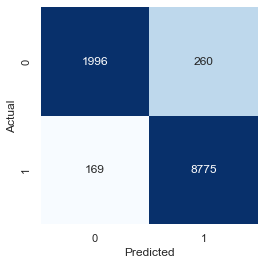

In [82]:
y_pred=best_model.predict(X_test)

data = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(data, columns=np.unique(y_test), index = np.unique(y_test))

df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (4,4))
sns.heatmap(df_cm, annot=True,cbar=False,
          vmax=500, square=True, fmt="d", cmap="Blues")

In [83]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.88      0.90      2256
           1       0.97      0.98      0.98      8944

    accuracy                           0.96     11200
   macro avg       0.95      0.93      0.94     11200
weighted avg       0.96      0.96      0.96     11200



## Out of sample Calssification

In [84]:
features_clf.describe(percentiles=[0.20, 0.40, 0.60, 0.80, 0.90])

,traffic_volume,hour,day_of_week,month,temp,holiday,rain_1h,clouds_all,weather_Clouds,weather_Mist,weather_Rain,weather_Snow,weather_other
count,44797.000000,44797.000000,44797.000000,44797.000000,44797.000000,44797.000000,44797.000000,44797.000000,44797.000000,44797.000000,44797.000000,44797.000000,44797.000000
mean,3255.856196,11.375159,2.985870,6.618702,9.181106,0.001295,0.109449,50.798156,0.310958,0.130522,0.125499,0.058866,0.110677
std,1992.446833,6.965494,2.003379,3.300168,11.014517,0.035959,0.624463,38.978401,0.462891,0.336881,0.331288,0.235376,0.313735
min,0.000000,0.000000,0.000000,1.000000,-14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
20%,856.000000,4.000000,1.000000,3.000000,-1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
40%,2732.000000,9.000000,2.000000,5.000000,5.000000,0.000000,0.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3355.000000,11.000000,3.000000,7.000000,10.000000,0.000000,0.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000
60%,4263.000000,14.000000,4.000000,8.000000,14.000000,0.000000,0.000000,75.000000,0.000000,0.000000,0.000000,0.000000,0.000000
80%,5185.000000,19.000000,5.000000,10.000000,20.000000,0.000000,0.000000,90.000000,1.000000,0.000000,0.000000,0.000000,0.000000
90%,5824.000000,21.000000,6.000000,11.000000,23.000000,0.000000,0.000000,90.000000,1.000000,1.000000,1.000000,0.000000,1.000000


In [85]:
df_synthetic1 = pd.DataFrame([features_clf.describe().loc['25%',:].values], columns=features_clf.columns)
df_synthetic2 = pd.DataFrame([features_clf.describe().loc['75%',:].values], columns=features_clf.columns)
df_synthetic3 = pd.DataFrame([features_clf.describe().loc['max',:].values], columns=features_clf.columns)
df_synthetic = pd.concat([df_synthetic1, df_synthetic2, df_synthetic3])
df_synthetic.reset_index(drop=True, inplace=True)
df_synthetic

,traffic_volume,hour,day_of_week,month,temp,holiday,rain_1h,clouds_all,weather_Clouds,weather_Mist,weather_Rain,weather_Snow,weather_other
0,1179.0,5.0,1.0,4.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,4941.0,17.0,5.0,9.0,19.0,0.0,0.0,90.0,1.0,0.0,0.0,0.0,0.0
2,7280.0,23.0,6.0,12.0,28.0,1.0,6.0,100.0,1.0,1.0,1.0,1.0,1.0


In [86]:
# Predict using selected model
y_prediction = best_model.predict(df_synthetic)
rowNumber = 0;
for value in y_prediction:
    if(value == 1):
        print("For row number %d it is good to use the route"%(rowNumber))
    else:
        print("For row number %d it is better to avoid the route"%(rowNumber))
    rowNumber += 1

For row number 0 it is good to use the route
For row number 1 it is good to use the route
For row number 2 it is good to use the route
